## Observations and Insights 

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete_dataset = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID'])

# Display the data table for preview
mouse_study_complete_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [122]:
# Checking the number of mice.
total_mice = len(mouse_study_complete_dataset["Mouse ID"].unique())
total_mice

249

In [123]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete_dataset.loc[mouse_study_complete_dataset.duplicated(subset = ["Timepoint","Mouse ID"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [124]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0
0,g989


In [125]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_complete_dataset[mouse_study_complete_dataset['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [126]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_df["Mouse ID"].unique())
number_of_mice

248

## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
drug_regimen_mean = clean_df.groupby("Drug Regimen").mean()["Tumour Volume (mm3)"]
drug_regimen_median = clean_df.groupby("Drug Regimen").median()["Tumour Volume (mm3)"]
drug_regimen_variance = clean_df.groupby("Drug Regimen").var()["Tumour Volume (mm3)"]
drug_regimen_std_deviation = clean_df.groupby("Drug Regimen").std()["Tumour Volume (mm3)"]
drug_regimen_SEM = clean_df.groupby("Drug Regimen").sem()["Tumour Volume (mm3)"]
drug_regimen_SEM
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": drug_regimen_mean, "Median":drug_regimen_median, "Variance":drug_regimen_variance, "Standard Deviation": drug_regimen_std_deviation, "SEM": drug_regimen_SEM})
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumour Volume (mm3)"]
summary_stats_table_2

/var/folders/1h/0r39311x6dl7xllmqf8zwv8r0000gn/T/ipykernel_5376/293018522.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumour Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

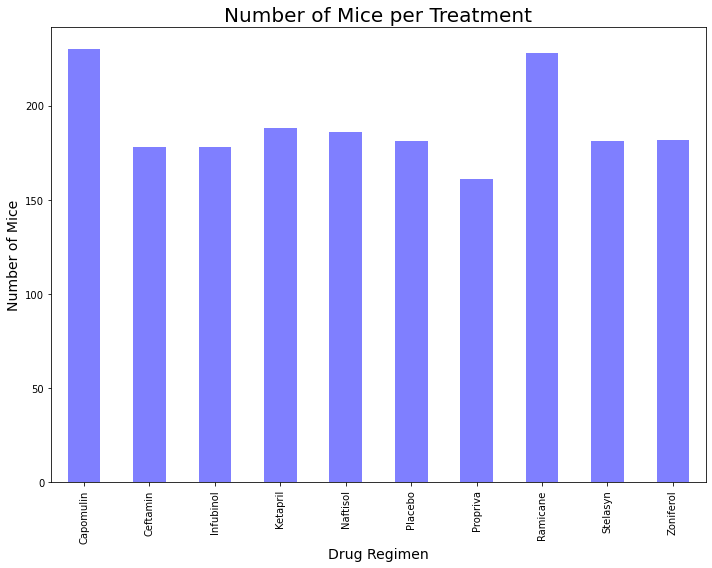

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [129]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice_per_tret = mouse_study_complete_dataset.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = total_mice_per_tret.plot.bar(figsize=(10, 8), color='b',alpha=0.5)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)


plt.tight_layout()
plt.show()

count_mice_per_tret

In [130]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_mice_list = mouse_study_complete_dataset.groupby(["Drug Regimen"]).count()["Mouse ID"].tolist()
total_mice_list


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

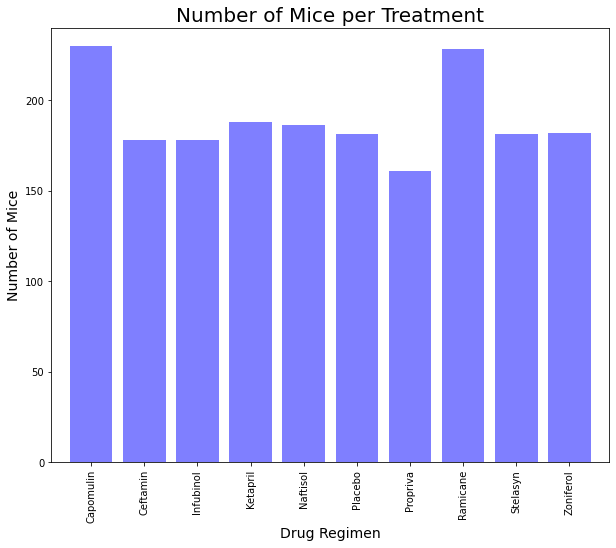

In [131]:
x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.bar(x_axis, total_mice_list, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(total_mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = mouse_study_complete_dataset.groupby(["Mouse ID", "Sex"])
gender_df = pd.DataFrame(mice_gender.size())
mouse_gender = (gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]
mouse_gender["Sex Percentage"]= (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender

,Total Count,Sex Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


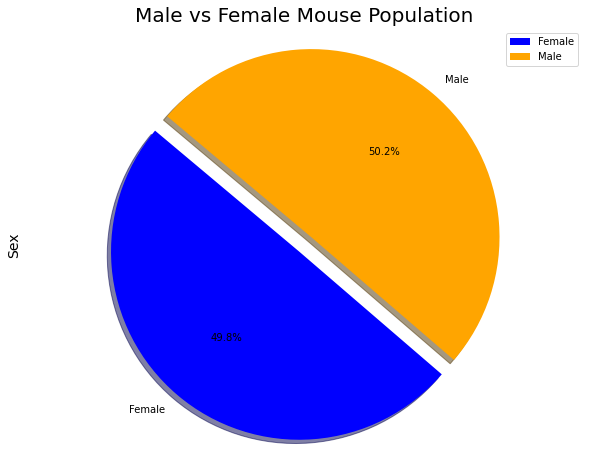

In [133]:
colors = ['blue', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10, 8), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")
plt.show()

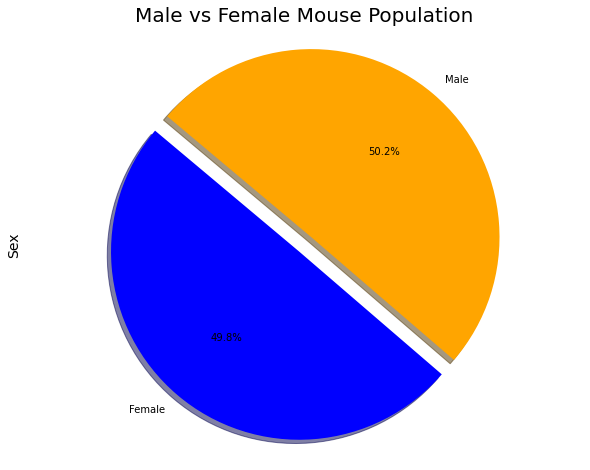

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['blue', 'orange']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_study_complete_dataset.loc[mouse_study_complete_dataset["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_study_complete_dataset.loc[mouse_study_complete_dataset["Drug Regimen"] == "Ramicane",:]
Infubinol_df = mouse_study_complete_dataset.loc[mouse_study_complete_dataset["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = mouse_study_complete_dataset.loc[mouse_study_complete_dataset["Drug Regimen"] == "Ceftamin",:]


Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol,mouse_study_complete_dataset, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_last,mouse_study_complete_dataset, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_last, mouse_study_complete_dataset, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge

Ceftamin_last  = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_df)
Ceftamin_merge = pd.merge(Ceftamin_last, mouse_study_complete_dataset, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [136]:
# qurtile and IQR for four drug regimns
#Capomulin
Capomulin_tumours = Capomulin_merge["Tumour Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumours: {lowerq}")
print(f"The upper quartile of Capomulin tumours: {upperq}")
print(f"The interquartile range of Capomulin tumours: {iqr}")
print(f"The median of Capomulin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumours: 32.37735684
The upper quartile of Capomulin tumours: 40.1592203
The interquartile range of Capomulin tumours: 7.781863460000004
The median of Capomulin tumours: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [137]:
# Ramicane
Ramicane_tumours = Ramicane_merge["Tumour Volume (mm3)"]
quartiles= Ramicane_tumours.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumours: {lowerq}")
print(f"The upper quartile of Ramicane tumours: {upperq}")
print(f"The interquartile range of Ramicane tumours: {iqr}")
print(f"The median of Ramicane tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumours: 31.56046955
The upper quartile of Ramicane tumours: 40.65900627
The interquartile range of Ramicane tumours: 9.098536719999998
The median of Ramicane tumours: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [138]:
#Infubinol

Infubinol_tumours = Infubinol_merge["Tumour Volume (mm3)"]
quartiles= Infubinol_tumours.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumours: {lowerq}")
print(f"The upper quartile of Infubinol tumours: {upperq}")
print(f"The interquartile range of Infubinol tumours: {iqr}")
print(f"The median of Infubinol tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumours: 54.04860769
The upper quartile of Infubinol tumours: 65.52574285
The interquartile range of Infubinol tumours: 11.477135160000003
The median of Infubinol tumours: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [139]:
# Ceftamin

Ceftamin_tumours = Ceftamin_merge["Tumour Volume (mm3)"]
quartiles= Ceftamin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumours: {lowerq}")
print(f"The upper quartile of Ceftamin tumours: {upperq}")
print(f"The interquartile range of Ceftamin tumours: {iqr}")
print(f"The median of Ceftamin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumours: 48.72207785
The upper quartile of Ceftamin tumours: 64.29983003
The interquartile range of Ceftamin tumours: 15.577752179999997
The median of Ceftamin tumours: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


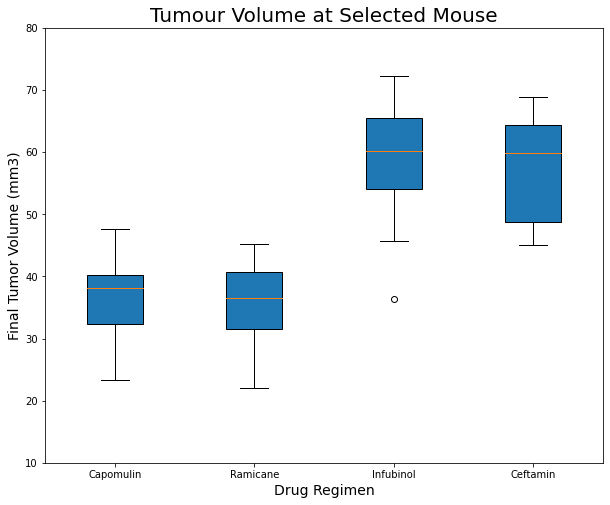

In [140]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
plot_data = [Capomulin_tumours, Ramicane_tumours, Infubinol_tumours, Ceftamin_tumours]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Tumour Volume at Selected Mouse',fontsize =20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(plot_data, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

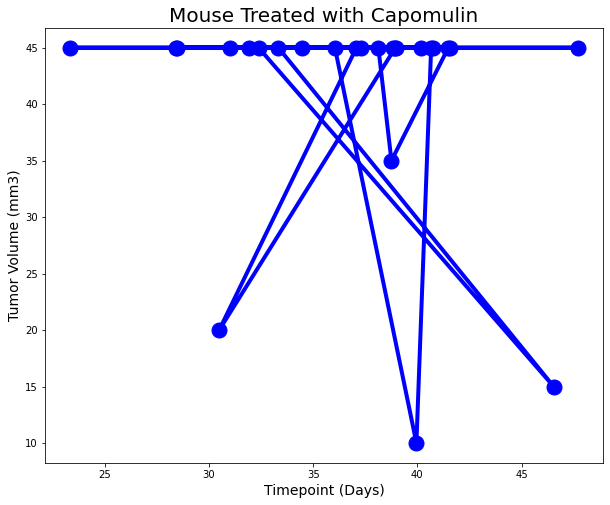

In [141]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
time = Capomulin_merge["Timepoint"]
x_axis = Capomulin_merge["Tumour Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10,8))
plt.title('Mouse Treated with Capomulin', fontsize =20)
plt.plot(x_axis,time,linewidth=4,markersize=15,marker="o",color="blue")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.show()

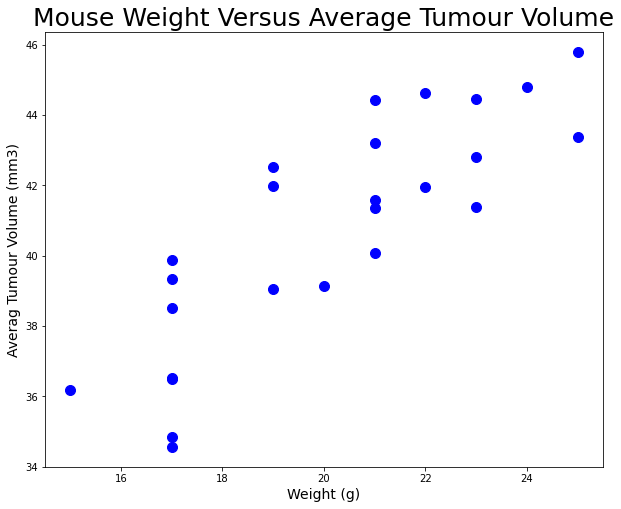

In [142]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 8))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=12
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumour Volume (mm3)'],s=100, color="blue")
plt.title('Mouse Weight Versus Average Tumour Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumour Volume (mm3)',fontsize =14)

plt.show()

## Correlation and Regression

In [143]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
